# Importing the relevent libraries

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings

warnings.filterwarnings('ignore')

# Load the data

In [35]:
df = pd.read_csv('Ad_click_dataset.csv')

# Calculate CTR

In [36]:
df['CTR'] = df['Clicked on Ad'].mean()

# Printing the information from the dataset

In [37]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,CTR
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0,0.4917
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0,0.4917
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0,0.4917
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0,0.4917
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1,0.4917


In [38]:
df.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,CTR
9995,41.73,31.0,61840.26,207.17,Profound executive flexibility,West Angelabury,Male,Singapore,2016-01-03 03:22:15,1,0.4917
9996,41.73,28.0,51501.38,120.49,Managed zero tolerance concept,Kennedyfurt,Male,Luxembourg,2016-05-28 12:20:15,0,0.4917
9997,55.60,39.0,38067.08,124.44,Intuitive exuding service-desk,North Randy,Female,Egypt,2016-01-05 11:53:17,0,0.4917
9998,46.61,50.0,43974.49,123.13,Realigned content-based leverage,North Samantha,Female,Malawi,2016-04-04 07:07:46,1,0.4917
9999,46.61,43.0,60575.99,198.45,Optimized upward-trending productivity,Port Jeffrey,Male,Northern Mariana Islands,2016-04-03 21:13:46,1,0.4917


In [39]:
df.sample(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,CTR
955,40.19,42.0,57868.44,199.43,Innovative interactive portal,Stewartbury,Male,Czech Republic,2016-04-06 11:24:21,1,0.4917
6883,71.28,54.0,53188.69,214.33,Face-to-face dedicated flexibility,East Jennifer,Male,Somalia,2016-03-31 20:55:22,1,0.4917
3018,89.05,44.0,57846.68,163.48,Fully-configurable neutral open system,Wintersfort,Male,Turkey,2016-07-06 23:09:07,1,0.4917
2943,81.75,19.0,62060.11,113.53,Function-based incremental standardization,Jamesville,Female,Burundi,2016-03-11 00:05:48,0,0.4917
9907,80.53,31.0,59886.58,207.17,Team-oriented zero-defect initiative,New Michael,Male,Hong Kong,2016-07-15 05:05:14,0,0.4917
8539,56.39,29.0,69646.35,105.22,Programmable uniform website,Wilsonburgh,Female,Australia,2016-02-14 10:06:49,0,0.4917
4243,81.58,41.0,57846.68,187.76,Down-sized background groupware,West Lisa,Female,Bulgaria,2016-07-17 14:26:04,0,0.4917
9153,56.39,46.0,40468.53,193.29,Automated multi-state toolset,Brownbury,Female,Australia,2016-02-28 23:10:32,1,0.4917
8104,81.75,29.0,69646.35,130.86,Horizontal client-server database,Williamsport,Male,Cayman Islands,2016-01-01 15:14:24,1,0.4917
1976,55.60,54.0,54286.10,162.08,Automated stable help-desk,Westshire,Female,South Africa,2016-01-16 23:37:51,1,0.4917


# Separate the age group

In [40]:
df['Age Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])
df['Daily Time Spent Bucket'] = pd.qcut(df['Daily Time Spent on Site'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Encode categorical variables

In [41]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Country'] = le.fit_transform(df['Country'])
df['Ad Topic Line'] = le.fit_transform(df['Ad Topic Line'])

In [42]:
# Prepare features for modeling
features = ['Age', 'Area Income', 'Daily Time Spent on Site', 'Gender', 'Country', 'Ad Topic Line']
X = df[features]
y = df['Clicked on Ad']

In [43]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models

In [45]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression(random_state=42)

# Train models

In [46]:
models = {
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "Logistic Regression": lr_model
}

In [47]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    results[name] = {
        "accuracy": accuracy,
        "confusion_matrix": conf_matrix,
        "classification_report": class_report
    }
    
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.2%}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)


Random Forest Results:
Accuracy: 82.15%
Confusion Matrix:
[[854 160]
 [197 789]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1014
           1       0.83      0.80      0.82       986

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000


Gradient Boosting Results:
Accuracy: 80.75%
Confusion Matrix:
[[848 166]
 [219 767]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1014
           1       0.82      0.78      0.80       986

    accuracy                           0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000


Logistic Regression Results:
Accuracy: 72.10%
Confusion Matrix:
[[780 234]
 [324 662]]
Classification Report:
              precisi

# Feature importance for Random Forest and Gradient Boosting

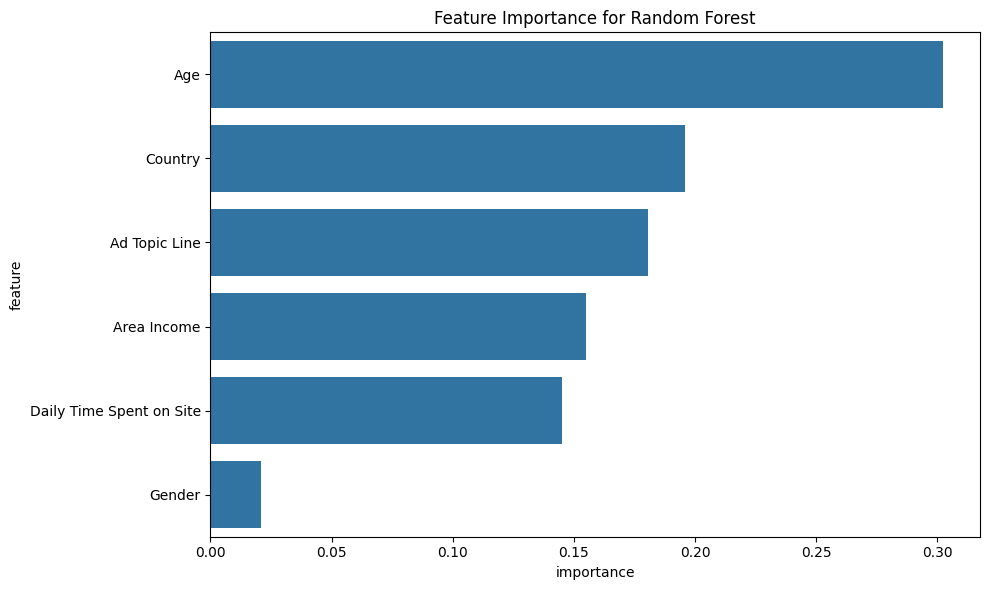


Random Forest Feature Importance:
                    feature  importance
0                       Age    0.302485
4                   Country    0.195926
5             Ad Topic Line    0.180757
1               Area Income    0.155073
2  Daily Time Spent on Site    0.145014
3                    Gender    0.020745


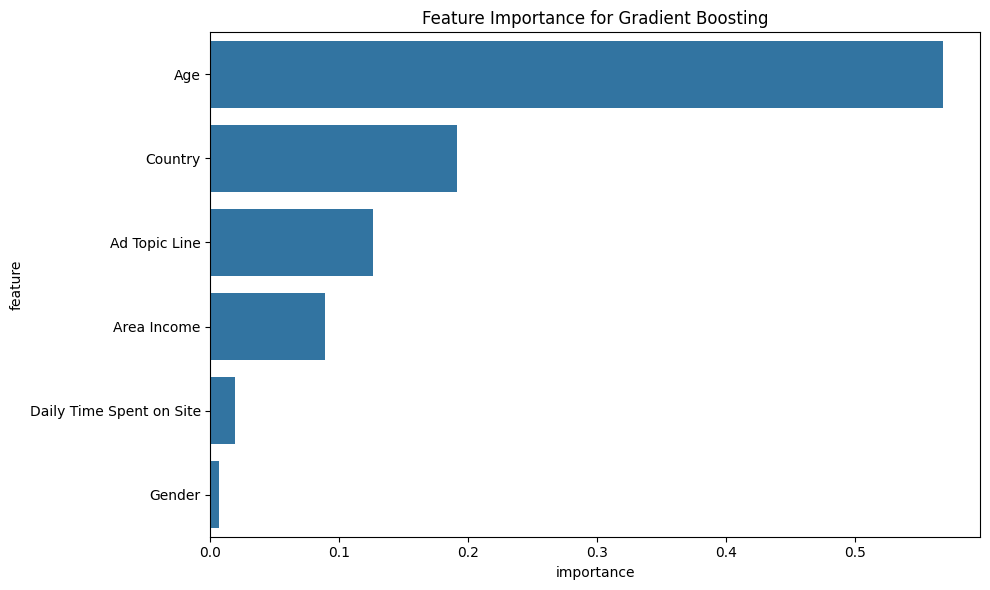


Gradient Boosting Feature Importance:
                    feature  importance
0                       Age    0.568197
4                   Country    0.191160
5             Ad Topic Line    0.125770
1               Area Income    0.089075
2  Daily Time Spent on Site    0.018786
3                    Gender    0.007012


In [48]:
for name in ["Random Forest", "Gradient Boosting"]:
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': models[name].feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title(f'Feature Importance for {name}')
    plt.tight_layout()
    plt.show()
    
    print(f"\n{name} Feature Importance:")
    print(feature_importance)

# Logistic Regression coefficients

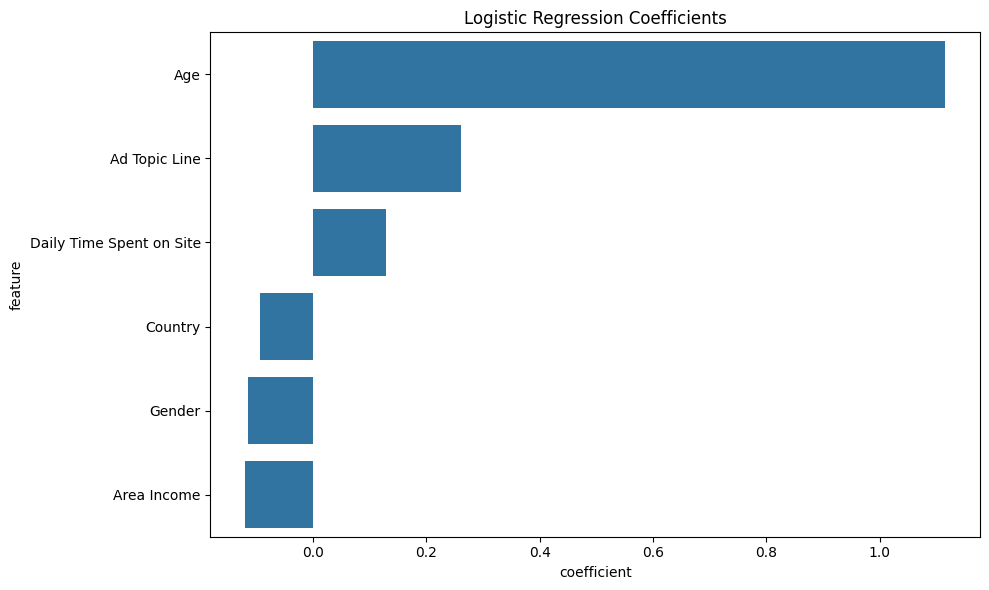


Logistic Regression Coefficients:
                    feature  coefficient
0                       Age     1.115311
5             Ad Topic Line     0.260604
2  Daily Time Spent on Site     0.128206
4                   Country    -0.094092
3                    Gender    -0.114653
1               Area Income    -0.119230


In [49]:
lr_coefficients = pd.DataFrame({
    'feature': features,
    'coefficient': lr_model.coef_[0]
}).sort_values('coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='coefficient', y='feature', data=lr_coefficients)
plt.title('Logistic Regression Coefficients')
plt.tight_layout()
plt.show()

print("\nLogistic Regression Coefficients:")
print(lr_coefficients)

# ROC Curve comparison

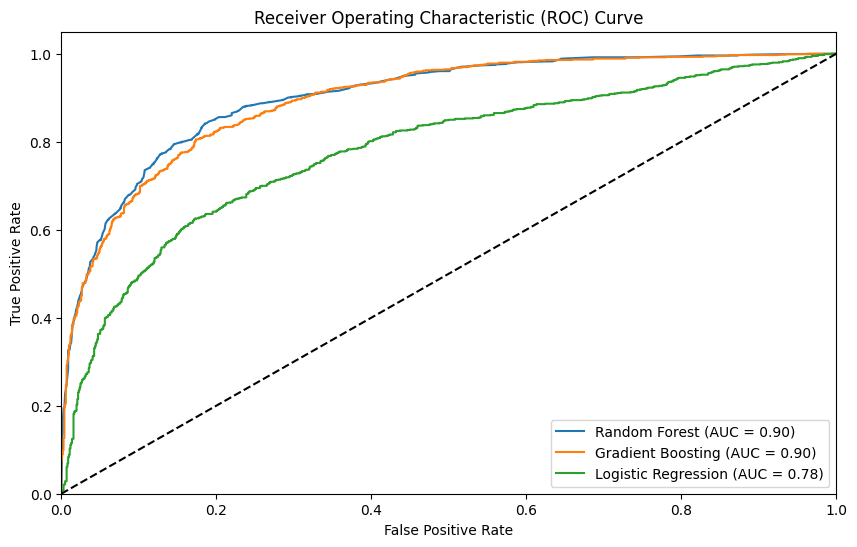

In [50]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Additional metrics

In [51]:
df['CTR_by_Country'] = df.groupby('Country')['Clicked on Ad'].transform('mean')
df['CTR_by_Age_Group'] = df.groupby('Age Group')['Clicked on Ad'].transform('mean')
df['CTR_by_Gender'] = df.groupby('Gender')['Clicked on Ad'].transform('mean')

print("\nTop 5 Countries by CTR:")
print(df.groupby('Country')['CTR_by_Country'].first().sort_values(ascending=False).head())

print("\nCTR by Age Group:")
print(df.groupby('Age Group')['CTR_by_Age_Group'].first().sort_values(ascending=False))

print("\nCTR by Gender:")
print(df.groupby('Gender')['CTR_by_Gender'].first())


Top 5 Countries by CTR:
Country
7     1.0
11    1.0
32    1.0
76    1.0
63    1.0
Name: CTR_by_Country, dtype: float64

CTR by Age Group:
Age Group
41-50    0.849242
51-60    0.844479
31-40    0.409466
21-30    0.263231
0-20     0.211538
60+           NaN
Name: CTR_by_Age_Group, dtype: float64

CTR by Gender:
Gender
0    0.514695
1    0.464965
Name: CTR_by_Gender, dtype: float64
